# Find extract actionable insights for improving retail business
- EDA big picture
- Hypothesis and question from data we have
- Overview on data in hand
- metadata of data
- ask more detail about data
- boost sale on specifice time
- boost sale on specifice week
- better inventory management (on each branch store)

## READ and Examining the dataset
- first screening : looking for missing data point in dataset : none
- change the data type to correct one : str for str, float and int : done

In [ ]:
pip install missingno

In [6]:
# import required lib
import missingno as msno 
import pandas as pd

In [7]:
# Read 'dh_transactions' into a DataFrame named transactions_df
transactions_df = pd.read_csv('DataFoodRetail/dh_transactions.csv') #, low_memory=False)

# Read 'dh_product_lookup' into a DataFrame named product_df
product_df = pd.read_csv('DataFoodRetail/dh_product_lookup.csv', 
                        dtype={'product_description':'str', 'commodity':'str', 'brand':'str', 'product_size':'str'})

# Read 'dh_causal_lookup' into a DataFrame named causal_df
causal_df = pd.read_csv('DataFoodRetail/dh_causal_lookup.csv', dtype={'feature_desc':'str', 'display_desc':'str'})

# Read 'dh_store_lookup' into a DataFrame named store_df
store_df = pd.read_csv('DataFoodRetail/dh_store_lookup.csv') 

<AxesSubplot: >

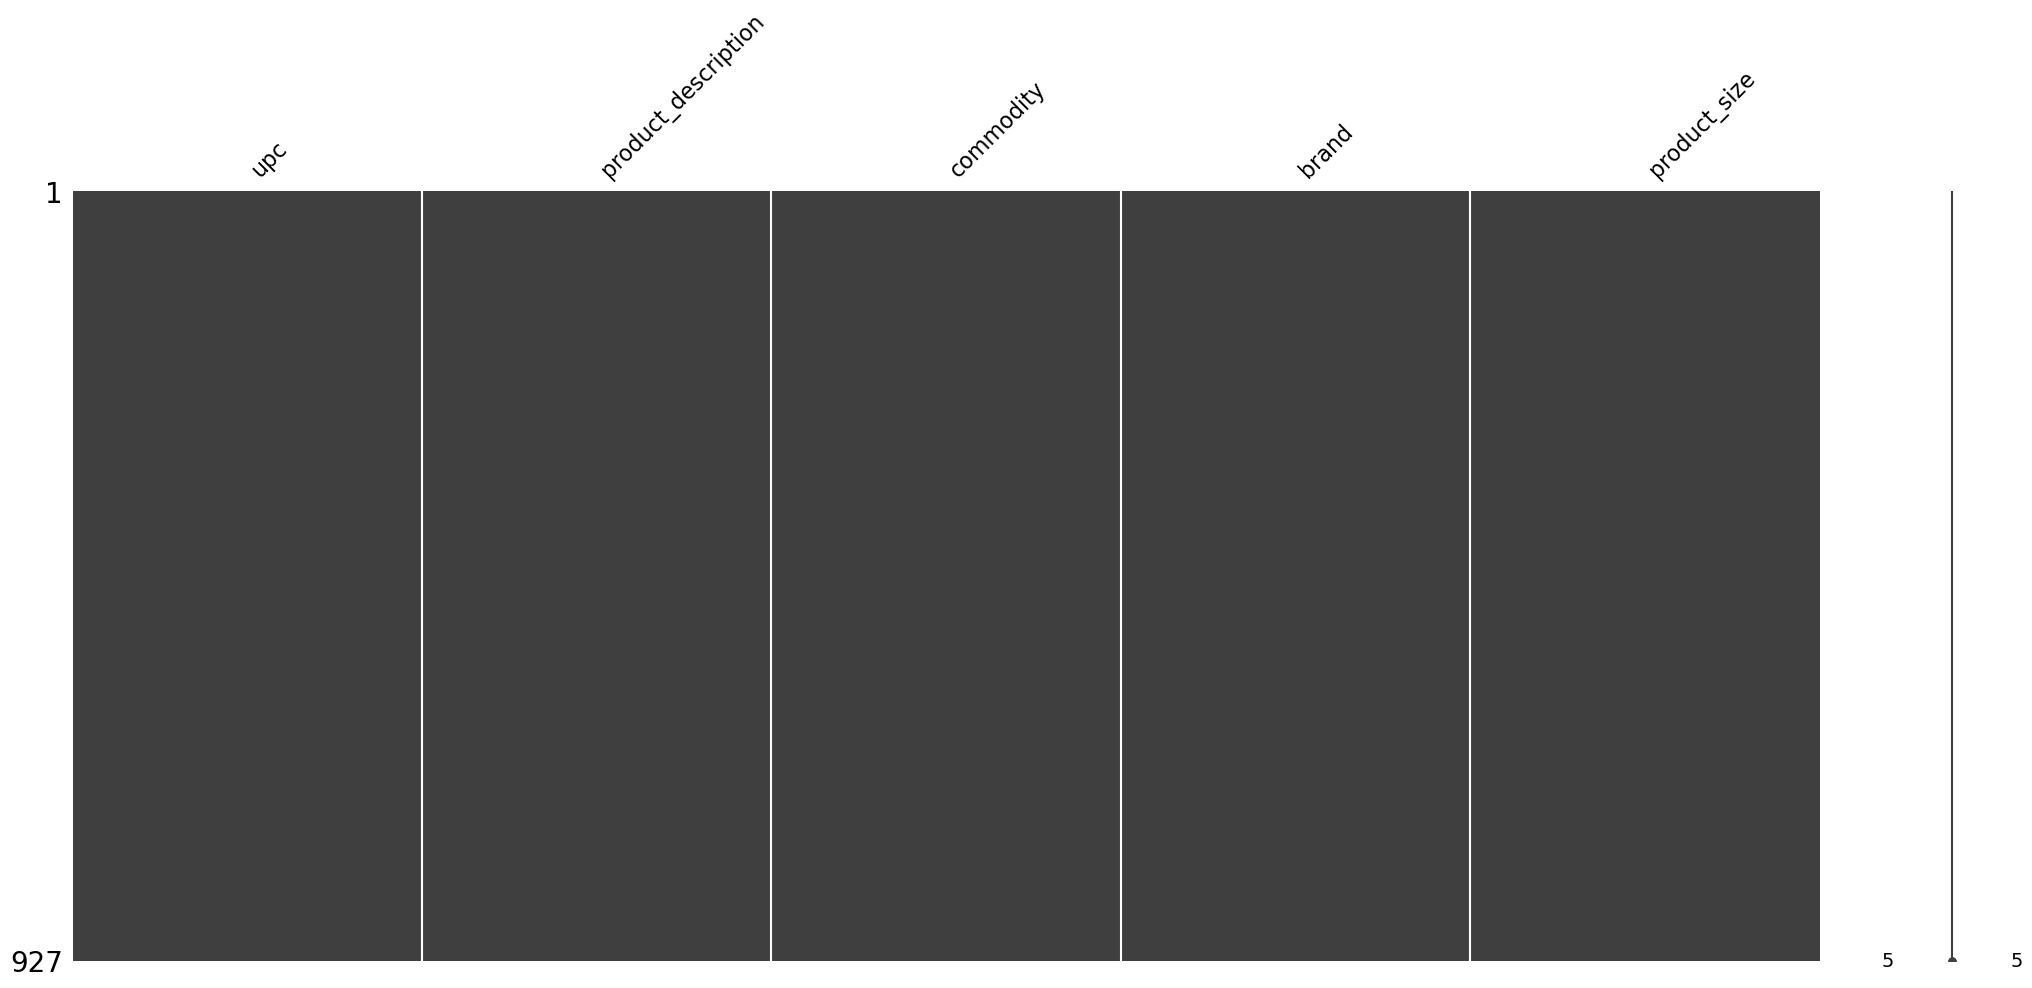

In [8]:
msno.matrix(product_df)

<AxesSubplot: >

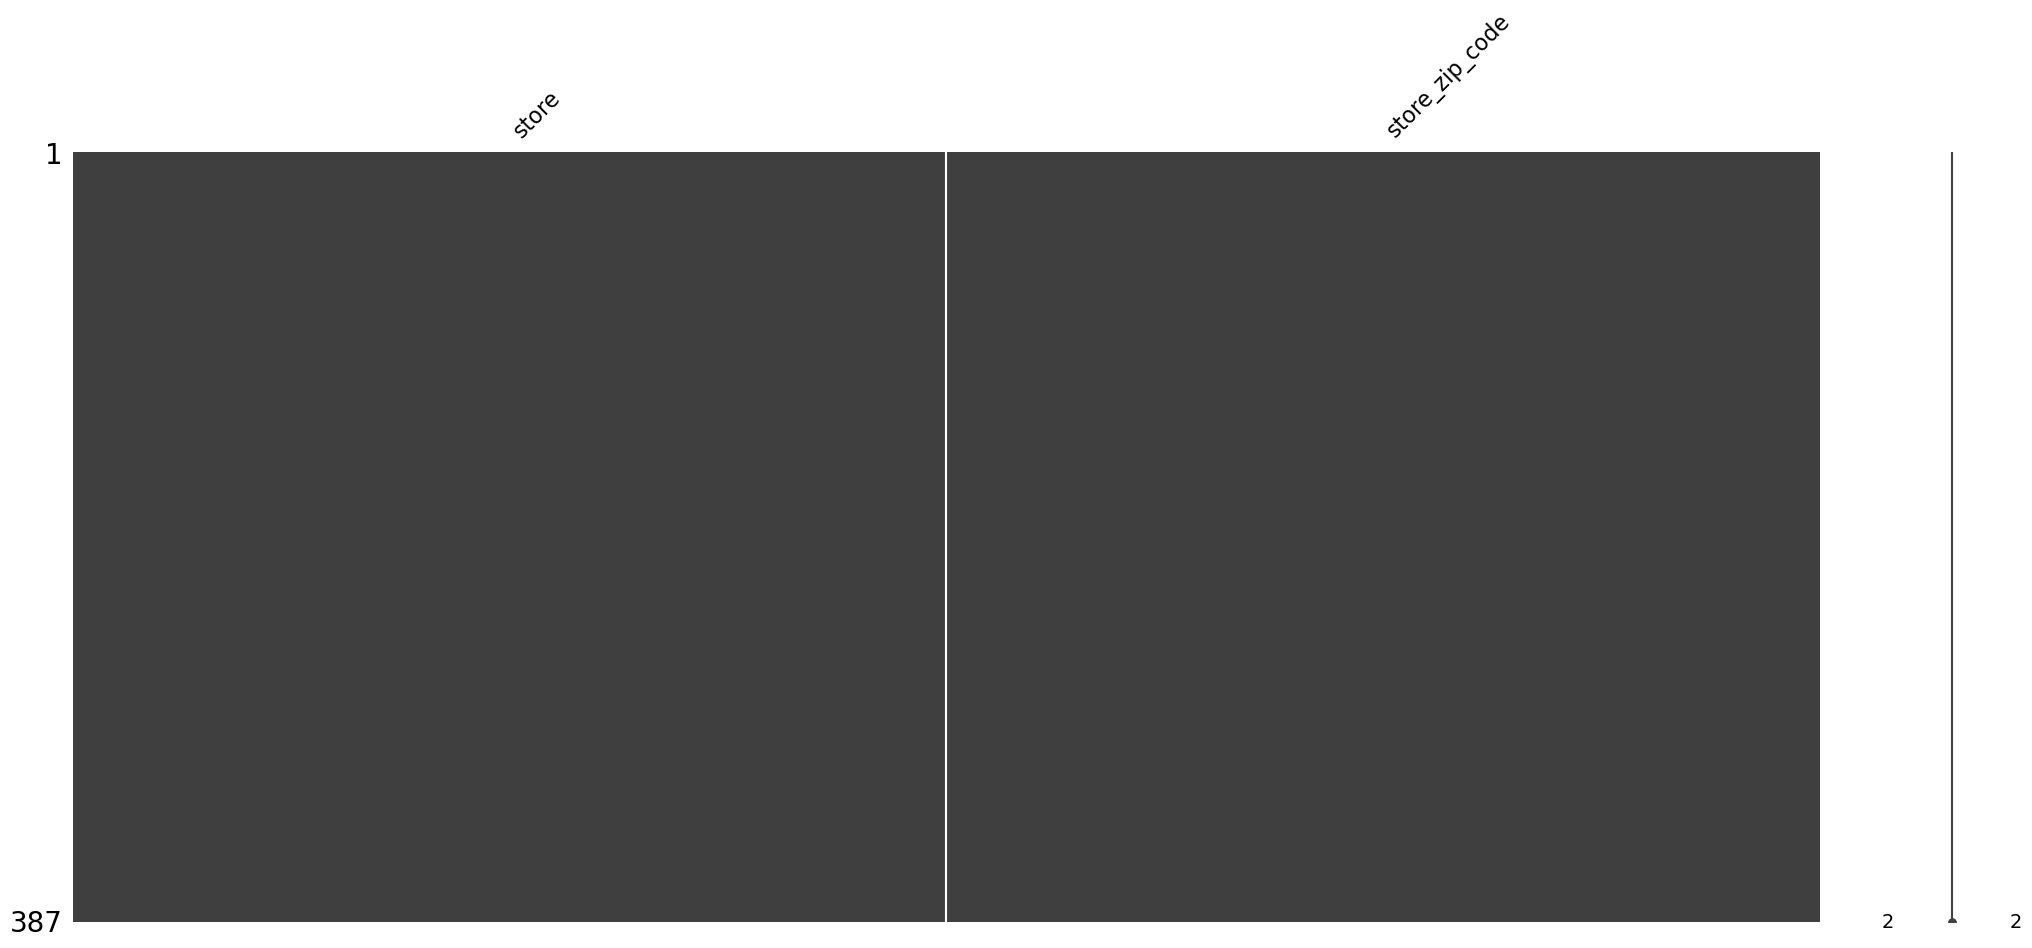

In [9]:
msno.matrix(store_df)

<AxesSubplot: >

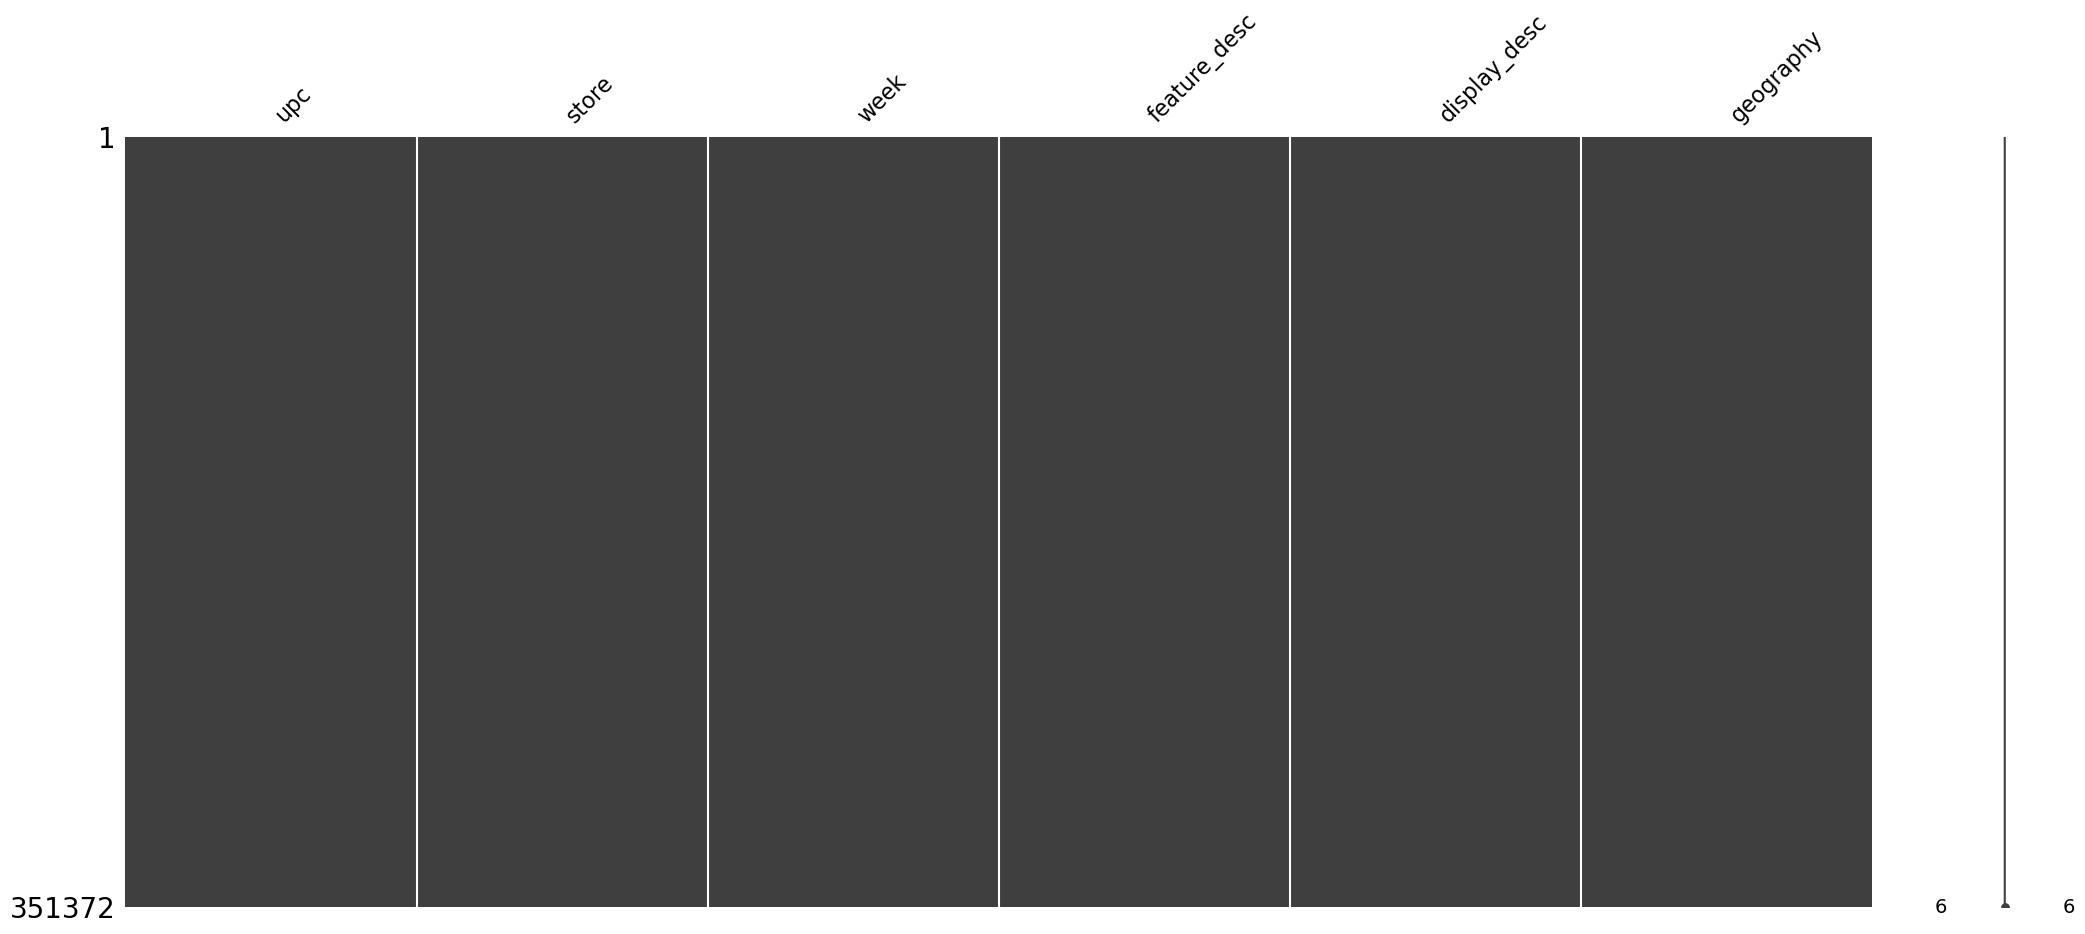

In [10]:
msno.matrix(causal_df)

<AxesSubplot: >

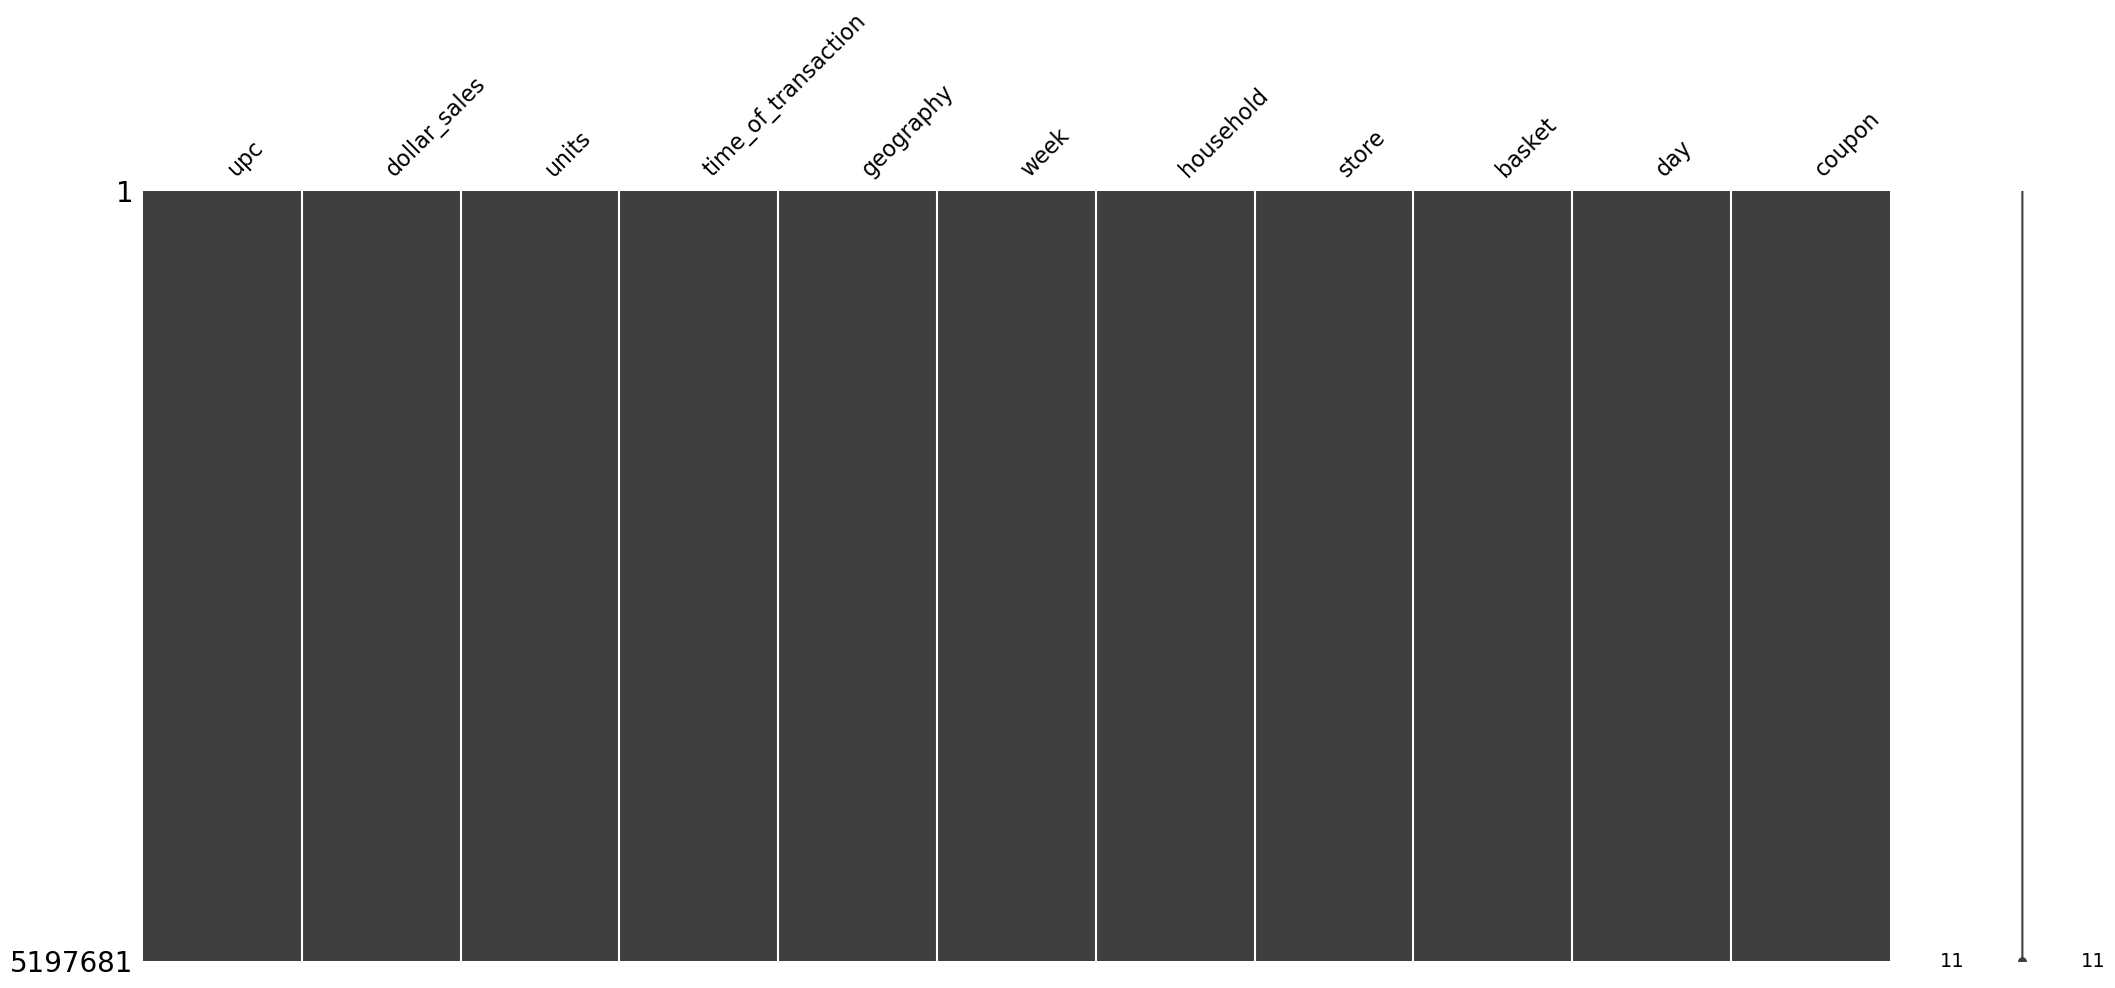

In [11]:
msno.matrix(transactions_df)

In [12]:
transactions_df.head()

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0


In [13]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197681 entries, 0 to 5197680
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   upc                  int64  
 1   dollar_sales         float64
 2   units                int64  
 3   time_of_transaction  int64  
 4   geography            int64  
 5   week                 int64  
 6   household            int64  
 7   store                int64  
 8   basket               int64  
 9   day                  int64  
 10  coupon               int64  
dtypes: float64(1), int64(10)
memory usage: 436.2 MB


In [14]:
causal_df.head()

,upc,store,week,feature_desc,display_desc,geography
0,7680850108,1,68,Wrap Interior Feature,Not on Display,1
1,5100001212,1,66,Wrap Back Feature,Not on Display,1
2,5100002792,1,72,Interior Page Feature,Not on Display,1
3,3620000300,1,55,Wrap Interior Feature,Not on Display,1
4,4112907742,1,68,Wrap Interior Feature,Not on Display,1


In [15]:
causal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351372 entries, 0 to 351371
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   upc           351372 non-null  int64 
 1   store         351372 non-null  int64 
 2   week          351372 non-null  int64 
 3   feature_desc  351372 non-null  object
 4   display_desc  351372 non-null  object
 5   geography     351372 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 16.1+ MB


In [16]:
product_df.head()

,upc,product_description,commodity,brand,product_size
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ
1,566300023,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,40 OZ
2,566300028,MILLER CANE SYRUP,syrups,Miller,19 OZ
3,566300029,MILLER CANE SYRUP,syrups,Miller,12 OZ
4,566300035,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,19 OZ


In [17]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   upc                  927 non-null    int64 
 1   product_description  927 non-null    object
 2   commodity            927 non-null    object
 3   brand                927 non-null    object
 4   product_size         927 non-null    object
dtypes: int64(1), object(4)
memory usage: 36.3+ KB


In [18]:
store_df.head()

,store,store_zip_code
0,1,37865
1,2,30084
2,3,30039
3,4,31210
4,5,30044


In [19]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   store           387 non-null    int64
 1   store_zip_code  387 non-null    int64
dtypes: int64(2)
memory usage: 6.2 KB


## Validation on each table 
- No missing value so far from visual check above
- from 4 table above have relation which can draw the ER-diagram 
- Look like sale analysis on each product
- Trend on selected item sale on specific period of time in this data


### product dataframe
- observe product ['upc', 'commodity', 'brand'] is unique in this table

In [20]:
product_df.drop_duplicates(subset=['upc', 'commodity', 'brand'])

,upc,product_description,commodity,brand,product_size
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ
1,566300023,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,40 OZ
2,566300028,MILLER CANE SYRUP,syrups,Miller,19 OZ
3,566300029,MILLER CANE SYRUP,syrups,Miller,12 OZ
4,566300035,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,19 OZ
...,...,...,...,...,...
922,9999985217,PRIVATE LABEL ALPHABETS,pasta,Private Label,16 OZ
923,9999985260,PRIVATE LABEL COMPLETE PANCAKE MIX,pancake mixes,Private Label,32 OZ
924,9999985261,PRIVATE LABEL COMPLETE PANCAKE MIX,pancake mixes,Private Label,2 LB
925,9999985488,PRIVATE LABEL ITAL NESTED ANGEL HAIR,pasta,Private Label Premium,16 OZ


In [50]:
product_df.product_size[product_df.product_size.str.contains("#")]

22      KH# 71916
115      KH# 8652
116      KH# 8651
117      KH# 8623
119     KH# 13384
120      KH# 8525
121      KH# 8627
142    ##########
151    ##########
198    ##########
199    ##########
397    ##########
530     KH# 61780
532     KH# 61779
537     KH# 69333
545      KH# 6862
576      KH# 2793
635     KH# 20749
696     %KH# 9390
701     KH# 18280
703     KH# 18283
707     KH# 18277
758    ##########
788     KH# 39724
789    %KH# 29483
790     KH# 68255
802     KH# 58442
Name: product_size, dtype: object

In [51]:
product_df[product_df.product_size.str.contains("#")]

,upc,product_description,commodity,brand,product_size
22,923100002,BOVES RSTD GRL SCE 26 OZ,pasta sauce,Boves,KH# 71916
115,2409407009,DECECCO CAPELLINI 16OZ,pasta,Dececco,KH# 8652
116,2409407011,DECECCO SPAGHETTINI 16OZ,pasta,Dececco,KH# 8651
117,2409407012,DECECCO SPAGHETTI 16OZ,pasta,Dececco,KH# 8623
119,2409407034,DECECCO FUSILLI 16OZ,pasta,Dececco,KH# 13384
120,2409407040,DECECCO PENNE REGATE 16OZ,pasta,Dececco,KH# 8525
121,2409407041,DECECCO PENNE RIGATE 16OZ,pasta,Dececco,KH# 8627
142,2682500951,LA RUSSA REGULAR EGG NOODLE PL,pasta,La Russa,##########
151,2706457001,VITA SPELT WHOLE GRAIN EGG NOO,pasta,Vita,##########
198,3068434050,TREE OF LIFE REGULAR BLACKSTRA,syrups,Tree of Life,##########


In [63]:
product_df.loc[product_df['upc'] == 923100002]

,upc,product_description,commodity,brand,product_size
22,923100002,BOVES RSTD GRL SCE 26 OZ,pasta sauce,Boves,KH# 71916


- these upc's product size is not right 
(Uniquely identifies a commodity number) 

In [72]:
product_df_cleaned = product_df.copy()
product_df_cleaned = product_df_cleaned[~product_df_cleaned.product_size.str.contains("#")] # flip the bool value
product_df_cleaned = product_df_cleaned.set_index('upc')

In [73]:
print(product_df.shape)
print(product_df_cleaned.shape)

(927, 5)
(900, 4)


- exclude 27 weird product size items from product list

In [74]:
product_df_cleaned.to_csv('cleaned_pasta/products_cleaned.csv')

- save clean products_cleaned.csv to clean folder

In [86]:
product_df.product_size.unique()

array(['25 OZ', '40 OZ', '19 OZ', '12 OZ', '26    OZ', '26 OUNCE',
       '26 OZ', '16 OZ', '17 OZ', '26.5 OZ', 'KH# 71916', '5 OZ',
       '10.5 OZ', '15 OZ', '24 OZ', '5.5 OZ', '7 OZ', 'N     1 LB',
       '32 OZ', '1 LB', '16  OZ', '16  Z', '8 OZ', '2 LB', '16OZ',
       '13.25 OZ', '6.75 OZ', '7.75 OZ', '1.5 LB', '27.6 OZ', ' ',
       '37 OZ', '7.25 OZ', '12 FL OZ', 'KH# 8652', 'KH# 8651', 'KH# 8623',
       'KH# 13384', 'KH# 8525', 'KH# 8627', '17.5 OZ', '10 OZ', '31.5 OZ',
       '31 1/2 OZ', '##########', '3LB', '24  OZ', '32    OZ', '36 OZ',
       '36    OZ', '6 1/2 OZ', 'CR   16 OZ', 'P     1 LB', 'P    16 OZ',
       'P    12 OZ', '14 OZ', '26 OZ.', '26.3 OZ', '16    OZ',
       '6 LB 11 OZ', '45 OZ', '45 OZ PET', '45    OZ', '45 OZ.',
       '25.3 OZ', '6.3 OZ', '23 OZ', '8.5 OZ', 'P    24 OZ', '10OZ',
       '10    OZ', '28 OZ', '12.00Z', '12    OZ', '24 FL OZ', '24OZ',
       '36 FL OZ', '17.7 OZ', '24    OZ', '17.6 OZ', '12.7 OZ', '25.5 OZ',
       '27.75 OZ', '67  OZ',

In [88]:
product_df_cleaned.product_size.unique()

array(['25 OZ', '40 OZ', '19 OZ', '12 OZ', '26    OZ', '26 OUNCE',
       '26 OZ', '16 OZ', '17 OZ', '26.5 OZ', '5 OZ', '10.5 OZ', '15 OZ',
       '24 OZ', '5.5 OZ', '7 OZ', 'N     1 LB', '32 OZ', '1 LB', '16  OZ',
       '16  Z', '8 OZ', '2 LB', '16OZ', '13.25 OZ', '6.75 OZ', '7.75 OZ',
       '1.5 LB', '27.6 OZ', ' ', '37 OZ', '7.25 OZ', '12 FL OZ',
       '17.5 OZ', '10 OZ', '31.5 OZ', '31 1/2 OZ', '3LB', '24  OZ',
       '32    OZ', '36 OZ', '36    OZ', '6 1/2 OZ', 'CR   16 OZ',
       'P     1 LB', 'P    16 OZ', 'P    12 OZ', '14 OZ', '26 OZ.',
       '26.3 OZ', '16    OZ', '6 LB 11 OZ', '45 OZ', '45 OZ PET',
       '45    OZ', '45 OZ.', '25.3 OZ', '6.3 OZ', '23 OZ', '8.5 OZ',
       'P    24 OZ', '10OZ', '10    OZ', '28 OZ', '12.00Z', '12    OZ',
       '24 FL OZ', '24OZ', '36 FL OZ', '17.7 OZ', '24    OZ', '17.6 OZ',
       '12.7 OZ', '25.5 OZ', '27.75 OZ', '67  OZ', '67 OZ', '48 OZ',
       '48    OZ', '28    OZ', '25.75 OZ', '25.6 OZ', '27.50 OZ',
       '27.5 OZ', '14.5 OZ', 

- product have <b> 4 categories </b>

In [22]:
print("product_description lists : {} ".format(len(product_df.product_description.unique())))
product_df.product_description.unique()

product_description lists : 872 brands


array(['VINCENT S ORIG MARINARA S', 'PINE MOUNTAIN SYRUP',
       'MILLER CANE SYRUP', 'BARILLA MARINARA PSTA SCE',
       'BARILLA SWT PEPPER/GARLIC', 'BARILLA ARRABBIATA SPCY P',
       'BARILLA\\BL GRN OLIVE SCE', 'BARILLA BASILICO SAUCE',
       'BARILLA CHAMAPNOLA SAUCE', 'BARILLA LASAG&CASS SAUCE',
       'BARILLA BOSCAIOLA SAUCE', 'ELENAS BREAD DIPPING SCE',
       'ELENAS BASIL&GARLIC SAUCE', 'ELENA SEMPLICE PMODORO',
       'ELENAS FORMAGGIO SAUCE', 'ELENAS AGLIO ARROSTITIO S',
       'ELENAS BASILICATA SAUCE', 'ELENAS QTRO A/H PSTA W/SC',
       'ELENAS TRE RNBW LNG PASTA', 'BOVES MARINARA PSTA SCE',
       'BOVES RSTD GRL SCE 26 OZ', 'BOVES CHNTI MSHR PSTA SCE',
       'BOVES RMNO PMDRA PSTA SCE', 'BOVES VODKA PSTA SAUCE',
       'BOVES ROASTED PEPPER SAUC', 'FASTSHAKE PANCAKE MIX BTR',
       'FASTSHAKE BUTTERMILK FMLY', 'FASTSHAKE BLUEBERRY',
       'GLDN EAGLE SYRUP REG', 'RR ARTICHOKE PASTA SAUCE',
       'GOOCH SOY ENRCH SPAGH', 'ALAGA REAL CANE FLV SYRUP',
       'ALAG

In [23]:
print("Brand lists : {} brands".format(len(product_df.brand.unique())))
product_df.brand.unique()

Brand lists : 131 brands


array(["Vincent's", 'Pine Mountain', 'Miller', 'Barilla', "Elena's",
       'Boves', 'Fastshake', 'Golden Eagle', 'RR', 'Gooch', 'Alaga',
       'M W Flapstax', 'Grandma Molases', 'Dell Amore', 'Creamette',
       'Pennsylvania Dutch', 'Healthy Harvest', 'Bisquick', "Bruce's",
       'Hungry Jack', "Newman's", 'Kraft', 'Brier Rabbit',
       'Sobrab Bkstrp', 'Dececco', 'Eden', 'Pomi', 'Annarino', 'La Russa',
       "Hunt's", 'Vita', 'Maggi Spaetzle', "Mother's", 'Mueller',
       'La Moderna', 'Aunt Jemima', 'Tree of Life', 'Fifty 50',
       'White Lily', 'Sugar Buster', 'Ronzoni', 'San Giorgio',
       'China Mandarin', 'Ragu', 'Bertolli', 'Farm Style', 'DaVinci',
       'Kellogg', 'Spring Tree', 'Colavita', 'Pasta Shoppe',
       'San Marzano', 'Classico', 'B F', 'Krusteaz', 'Pioneer', 'Pennant',
       'Lund Swede', 'Braswell', 'Log Cabin', 'Buitoni',
       'Mrs Butterworth', 'Raos', 'Castelna', 'Karo', 'Cara Nona',
       'Walnut Acres', 'Lucini', 'Prego', "Joey's", 'Smuckers', "

- product have <b> 131 brands </b>

### store dataframe

- unique zip code is <b>299 locations </b>
- zip code tell the location : try cross check with us state zip code
- I assume this is USA zip code  (can compare with the list from us zipcode: https://github.com/zauberware/postal-codes-json-xml-csv/blob/master/data/US.zip)

In [24]:
# count data colume and row
store_df.shape

(387, 2)

In [25]:
# clarify unique zip code on this dataset
store_df.store_zip_code.value_counts()

37211    5
40502    4
30064    4
30024    3
37064    3
        ..
30032    1
29801    1
37876    1
30122    1
42367    1
Name: store_zip_code, Length: 299, dtype: int64

### transaction dataframe
- check upc in transaction with causal dataframe to validate the dataset : the upc in this 2 table is correctly align  
with 5197681 rows of transaction dataframe
- check store on both table : store number correct.
- "time_of_transaction" show

In [26]:
transactions_df[transactions_df['upc'].isin(product_df['upc'])]

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5197676,9999985001,0.39,1,2354,1,104,435465,199,3316346,728,0
5197677,9999966720,1.05,1,2354,1,104,435465,199,3316346,728,0
5197678,9999985027,0.99,1,2311,1,104,352690,218,3316347,728,0
5197679,3620000300,1.53,1,2245,1,104,55530,93,3316348,728,0


In [27]:
transactions_df[transactions_df['store'].isin(store_df['store'])]

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5197676,9999985001,0.39,1,2354,1,104,435465,199,3316346,728,0
5197677,9999966720,1.05,1,2354,1,104,435465,199,3316346,728,0
5197678,9999985027,0.99,1,2311,1,104,352690,218,3316347,728,0
5197679,3620000300,1.53,1,2245,1,104,55530,93,3316348,728,0


In [28]:
#check time of transaction
transactions_df.time_of_transaction.value_counts()

1734    9843
1739    9780
1728    9715
1752    9689
1743    9673
        ... 
344       49
422       49
429       46
432       45
447       43
Name: time_of_transaction, Length: 1440, dtype: int64

- notice that time digit is not always 4 digit
- chanage the datatype of this column

In [29]:
# convert the column to string, add leading zeros and convert to datetime:

transactions_df_valid = transactions_df.copy()
transactions_df_valid.time_of_transaction = pd.to_datetime(transactions_df_valid['time_of_transaction'].astype(str).str.zfill(4), format='%H%M').dt.time
transactions_df_valid.head()

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
0,7680850106,0.80,1,11:00:00,2,1,125434,244,1,1,0
1,3620000470,3.59,1,11:00:00,2,1,125434,244,1,1,0
2,1800028064,2.25,1,11:37:00,2,1,108320,244,2,1,0
3,9999985067,0.85,1,11:48:00,2,1,162016,244,3,1,0
4,9999985131,2.19,1,13:23:00,2,1,89437,244,4,1,0


In [30]:
transactions_df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197681 entries, 0 to 5197680
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   upc                  int64  
 1   dollar_sales         float64
 2   units                int64  
 3   time_of_transaction  object 
 4   geography            int64  
 5   week                 int64  
 6   household            int64  
 7   store                int64  
 8   basket               int64  
 9   day                  int64  
 10  coupon               int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 436.2+ MB


In [31]:
# check day
transactions_df.day.unique()

array([  1,   2,   3,   4,   5,   7,   6,   8,   9,  11,  10,  13,  14,
        12,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  35,  34,  36,  37,  38,  40,
        39,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  55,  54,  56,  57,  58,  59,  60,  61,  62,  63,  65,  64,
        66,  67,  68,  69,  71,  70,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  90,  89,  91,
        92,  93,  94,  95,  97,  96,  98,  99, 100, 101, 103, 102, 105,
       104, 106, 107, 108, 109, 110, 112, 111, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 154, 153, 155, 156, 157, 158,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
       186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 206, 207, 208,
       209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

- day number can change to date assume start year 2020

In [32]:
from datetime import datetime, date, timedelta
  
# initializing day number
day_num = "339"
  
# print day number
print("The day number : " + str(day_num))
  
# adjusting day num
day_num.rjust(3 + len(day_num), '0')

# Initialize year
year = "2020"
  
# Initializing start date
strt_date = date(int(year), 1, 1)
  
# converting to date
res_date = strt_date + timedelta(days=int(day_num) - 1)
res = res_date.strftime("%Y-%m-%d")
  
# printing result
print("Resolved date : " + str(res))

The day number : 339
Resolved date : 2020-12-04


In [33]:
def daytodate(day_num):
    ''' 
        THis function convert day number to date 
        year : specific initialize year
        start date : specific nitializing start date
    '''
    # Initialize year
    year = "2020"
    
    # Initializing start date
    strt_date = date(int(year), 1, 1)

    # converting to date
    res_date = strt_date + timedelta(days=int(day_num) - 1)
    res = res_date.strftime("%Y-%m-%d")
    return str(res)
    


In [34]:
#test lambda apply to pd.Series
transactions_df_valid.day.apply(daytodate)

0          2020-01-01
1          2020-01-01
2          2020-01-01
3          2020-01-01
4          2020-01-01
              ...    
5197676    2021-12-28
5197677    2021-12-28
5197678    2021-12-28
5197679    2021-12-28
5197680    2021-12-28
Name: day, Length: 5197681, dtype: object

- Add new date column into transaction dataframe

In [35]:
# Add date column : ใช้ lampda x ใช้ fundtion รูดทั้ง column day number convert to date ..... ไป def function จาก concept above

transactions_df_valid['date'] = transactions_df_valid.day.apply(daytodate)
transactions_df_valid.head()

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,date
0,7680850106,0.80,1,11:00:00,2,1,125434,244,1,1,0,2020-01-01
1,3620000470,3.59,1,11:00:00,2,1,125434,244,1,1,0,2020-01-01
2,1800028064,2.25,1,11:37:00,2,1,108320,244,2,1,0,2020-01-01
3,9999985067,0.85,1,11:48:00,2,1,162016,244,3,1,0,2020-01-01
4,9999985131,2.19,1,13:23:00,2,1,89437,244,4,1,0,2020-01-01


- Add datetime column

In [36]:
# Add datetime column and day of week (0=monday, 6=sunday)
transactions_df_valid['datetime'] = pd.to_datetime(transactions_df_valid['date'] + transactions_df_valid['time_of_transaction'].astype(str), format='%Y-%m-%d%H:%M:%S')
transactions_df_valid['dayofweek'] = transactions_df_valid['datetime'].dt.dayofweek
transactions_df_valid.head()

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,date,datetime,dayofweek
0,7680850106,0.80,1,11:00:00,2,1,125434,244,1,1,0,2020-01-01,2020-01-01 11:00:00,2
1,3620000470,3.59,1,11:00:00,2,1,125434,244,1,1,0,2020-01-01,2020-01-01 11:00:00,2
2,1800028064,2.25,1,11:37:00,2,1,108320,244,2,1,0,2020-01-01,2020-01-01 11:37:00,2
3,9999985067,0.85,1,11:48:00,2,1,162016,244,3,1,0,2020-01-01,2020-01-01 11:48:00,2
4,9999985131,2.19,1,13:23:00,2,1,89437,244,4,1,0,2020-01-01,2020-01-01 13:23:00,2


In [37]:
# check week
transactions_df.week.value_counts()
transactions_df.week.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  22,  23,  24,  25,  26,  27,  28,  30,
        31,  32,  33,  21,  19,  20,  41,  42,  43,  48,  51,  52,  34,
        35,  29,  36,  37,  38,  39,  40,  44,  45,  46,  47,  49,  50,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104],
      dtype=int64)

- One Gregorian calendar year has approximately 52 weeks
- from week here assume it 2 years data period

In [38]:
#check geography (geography group of store)
transactions_df.geography.value_counts()

1    2811293
2    2386388
Name: geography, dtype: int64

- clearly see 2 group of geography store

In [39]:
#check coupon (1 = yes use coupon , 0 = no coupon)
coupon = transactions_df.coupon.value_counts()
print(coupon)
print("percentage of coupon used : {} %".format((coupon[1]/coupon[0])*100 ))

0    5106493
1      91188
Name: coupon, dtype: int64
percentage of coupon used : 1.785726525033913 %


- percentage of coupon used : 1.785726525033913 %

In [40]:
causal_df.head()

,upc,store,week,feature_desc,display_desc,geography
0,7680850108,1,68,Wrap Interior Feature,Not on Display,1
1,5100001212,1,66,Wrap Back Feature,Not on Display,1
2,5100002792,1,72,Interior Page Feature,Not on Display,1
3,3620000300,1,55,Wrap Interior Feature,Not on Display,1
4,4112907742,1,68,Wrap Interior Feature,Not on Display,1


- check digit consistency in upc column

In [41]:
# check digit consistency in upc column
transactions_df.upc.astype('str').str.len().value_counts()

10    5139245
9       58436
Name: upc, dtype: int64

In [85]:
transactions_df.units.unique()

array([  1,   4,   2,   3,   5,   6,   8,   7,  12,   9,  10,  11,  15,
        14,  18,  16,  29,  30,  20,  17,  25,  19,  31,  23,  24,  13,
        26,  34,  22,  27,  21,  48,  49,  59,  28,  36,  40,  96,  42,
       120,  50, 156,  35,  37,  33, 133,  72,  51,  60], dtype=int64)

### cuasal dataframe

- upc number have 10 and 9 digit all the table reference seem not to be any issue here.

In [42]:
# check digit consistency in upc column
causal_df.upc.astype('str').str.len().value_counts()

10    346198
9       5174
Name: upc, dtype: int64

In [43]:
# check digit consistency in upc column
product_df.upc.astype('str').str.len().value_counts()

10    900
9      27
Name: upc, dtype: int64

In [47]:
causal_df.display_desc.unique()

array(['Not on Display', 'Rear End Cap', 'Store Rear', 'Front End Cap',
       'In-Shelf', 'Store Front', 'Secondary Location Display',
       'In-Aisle', 'Promo/Seasonal Aisle', 'Side-Aisle End Cap',
       'Mid-Aisle End Cap'], dtype=object)

In [48]:
causal_df.feature_desc.unique()

array(['Wrap Interior Feature', 'Wrap Back Feature',
       'Interior Page Feature', 'Not on Feature',
       'Interior Page Line Item', 'Wrap Front Feature',
       'Front Page Feature', 'Back Page Feature'], dtype=object)

- more detail on this feature description!

### cleaned transaction dataframe

- rearranage column on clean dataframe to be use to next step

In [44]:
transactions_df_valid = transactions_df_valid[['upc', 'dollar_sales', 'units', 'geography',
                                            'household', 'store', 'basket', 'coupon', 'datetime', 
                                            'date', 'time_of_transaction', 'day', 'dayofweek', 'week']]
transactions_df_valid.head(5)

,upc,dollar_sales,units,geography,household,store,basket,coupon,datetime,date,time_of_transaction,day,dayofweek,week
0,7680850106,0.80,1,2,125434,244,1,0,2020-01-01 11:00:00,2020-01-01,11:00:00,1,2,1
1,3620000470,3.59,1,2,125434,244,1,0,2020-01-01 11:00:00,2020-01-01,11:00:00,1,2,1
2,1800028064,2.25,1,2,108320,244,2,0,2020-01-01 11:37:00,2020-01-01,11:37:00,1,2,1
3,9999985067,0.85,1,2,162016,244,3,0,2020-01-01 11:48:00,2020-01-01,11:48:00,1,2,1
4,9999985131,2.19,1,2,89437,244,4,0,2020-01-01 13:23:00,2020-01-01,13:23:00,1,2,1


In [80]:
transactions_df_valid.household.unique()
len(transactions_df_valid.household.unique())
#check most frequent shopper custormer

510027

- custermer 510027 households

- basket? more detail

In [45]:
transactions_df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197681 entries, 0 to 5197680
Data columns (total 14 columns):
 #   Column               Dtype         
---  ------               -----         
 0   upc                  int64         
 1   dollar_sales         float64       
 2   units                int64         
 3   geography            int64         
 4   household            int64         
 5   store                int64         
 6   basket               int64         
 7   coupon               int64         
 8   datetime             datetime64[ns]
 9   date                 object        
 10  time_of_transaction  object        
 11  day                  int64         
 12  dayofweek            int64         
 13  week                 int64         
dtypes: datetime64[ns](1), float64(1), int64(10), object(2)
memory usage: 555.2+ MB


- save cleaned csv to cleaned zone

In [46]:

transactions_df_valid.to_csv('cleaned_pasta/transactions_cleaned.csv')


In [75]:
transactions_df_valid.shape

(5197681, 14)

In [76]:
transactions_df_valid.set_index("upc").shape

(5197681, 13)

In [77]:
transactions_df_valid.set_index("upc").to_csv('cleaned_pasta/transactions_cleaned.csv')

## Exploratory Data Analysis
EDA viz by Tableau